# Module 14 - Hypothesis Testing: Answering Questions about Data  

**_Author: Carleton Smith, Jessica Cervi_**

**_Revised: Jessica Cervi_**

**Expected time = 3 hours**

**Total points = 75 points**


## Assignment Overview

In this assignment, you will work on **Hypothesis testing**. Hypothesis testing is a framework for evaluating research questions in data science. Developing a clear foundation in this framework is _central_ to furthering your career goals in research, academia, and as a data scientist. 

Many of the steps we cover in this lesson will seem reminiscent of the scientific method you likely learned early in your education. Hypothesis testing is primarily a more sophisticated approach to the steps of the scientific method allowing you to determine appropriate methodological approaches, collect data, and clearly draw conclusions from the results of statistical tests.

This assignment is divided into two parts. 

In the first part, we will guide through the steps to compute a **Confidence Interval**.
We will generate a normal distribution of people having a certain weight and we will extract a random sample of a population. We will see how many of those people have a weight consistent with the average body mass of people that go to the gym.

In the second part, you will learn the key steps of hypothesis testing by walking through a case study of an **A/B test** with a web analytics data set.


This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are expicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 


### Learning Objectives

- Use and interpret confidence intervals (CIs)
- Identify the appropriate confidence level for your data and research question
- Develop and test a hypothesis using t-tables and t-multipliers
- Interpet statistical significance and the P-value of your model
- Apply hypothesis testing to an A/B testing example

## Index: 

#### Module 14 - Hypothesis Testing: Answering Questions about Data  

- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)
- [Question 10](#q10)
- [Question 11](#q11)
- [Question 12](#q12)




## Module 14 - Hypothesis Testing: Answering Questions about Data  

## Part 1: Confidence Intervals


A confidence interval (CI) is a range of values in which there's a specified probability that the expected true population parameter lies within it.

Below we import the necessary libraries and  generate a normal distributions using the `NumPy` random module's `normal()` method of mass values for men. This gives us a randomized data set of body weight values for men. 

In [1]:
#importing the libraries
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt

In [2]:
#setting random seed
np.random.seed(42)

mass_male = np.random.normal(loc=181, scale=24, size=6000)

In [6]:
mass_male

array([192.92113967, 177.68165677, 196.54452491, ..., 151.78230896,
       192.23081013, 152.91326305])

[Back to top](#Index:) 
<a id='q1'></a>

### Question 1:

*5 points*

Use the NumPy function `random.seed()` to set a random seed equal to 0.
Following the example above, create a normal distribution using the `NumPy` random module's `normal()` method of body mass values for females. Assign this array to the variable `mass_femal`. Set the following paramenters:
- loc = 132
- scale = 22
- size = 6500

Finally, concatenate these two arrays and assign them to the column `ans1` and convert this array to a dataframe `df_ppl_mass`. Rename the first column of the dataframe `people_mass`.



In [36]:
### GRADED

np.random.seed(0)

mass_male = np.random.normal(loc=181, scale=24, size=6000)

### YOUR SOLUTION HERE
mass_female = np.random.normal(loc=132, scale=22, size=6500)

ans1 = np.concatenate((mass_male, mass_female), axis=0)
df_ppl_mass = pd.DataFrame(ans1, columns = ['people_mass'])

###
### YOUR CODE HERE
###


In [37]:
df_ppl_mass

,people_mass
0,223.337256
1,190.603773
2,204.489712
3,234.781437
4,225.821392
...,...
12495,141.319786
12496,157.228908
12497,123.118164
12498,130.421018


In [27]:
array1.shape

(12500,)

In [22]:
mass_female.shape

(6500,)

In [23]:
mass_male.shape

(6000,)

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q2'></a>

### Question 2:

*5 points*

Use the `.distplot` command from the `seaborn` library (already imported above) to visualize the distribution of `people_mass` generated in Question 1. Set the title equal to "Body Mass Distribution of People in the U.S.". Do not specify any other parameter.

Save the plot in the `/results` folder as `plot2`.


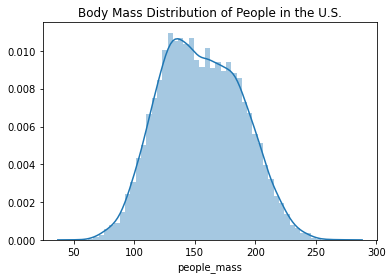

In [42]:
### GRADED

### YOUR SOLUTION HERE
ans2 = sns.distplot(df_ppl_mass['people_mass'])
plt.title("Body Mass Distribution of People in the U.S.")
plt.savefig('results/plot2.png')

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, we want to study the weight of people that go to the gym regularly.

Suppose that mean body mass of 40 randomly selected people who go the gym at least three times per week is 160 pounds. 

We are curious to see how this compares to our current population of people's body mass. In order to compare this new sample of people from the gym, I need to compare it to an equivalent distribution of sample means from our population.

I need to calculate where this sample mean of 160 pounds would fall on the distribution of sample means from the body masses of the U.S. population.

[Back to top](#Index:) 
<a id='q3'></a>

### Question 3:

*10 points*

Use the NumPy function `random.seed()` to set a random seed equal to 0.

Create an empty list `sample_means` of sample means from our original data.

Given our population mass values, take 300 samples each of 25 random values with replacement. 
Next, for each sample, calculate the mean of the sample and store all those sample means in the list `sample_means`.

**HINT:** Random sampling with replacement can be computed using the following line:

```python
sample_values = np.random.choice(a=df_ppl_mass['people_mass'], size=n) 
```

In [75]:
### GRADED
np.random.seed(0)

# 300 samples of the means of 25 random values with replacement
sample_means = []

for i in range(0,300):
    sample_means.append(np.mean(np.random.choice(a=df_ppl_mass['people_mass'], size=n)))

n =25
### YOUR SOLUTION HERE
#sample_means = None

###
### YOUR CODE HERE
###


In [76]:
len(sample_means)

300

In [77]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, we can visualize Gym Sample Mean (160 pounds) compared to the sampling distribution selected in Question 3.

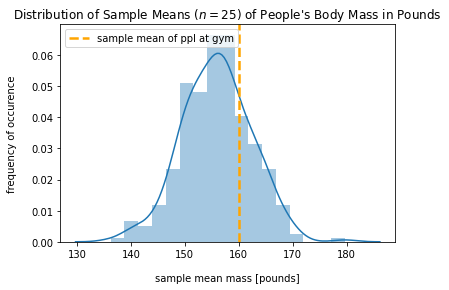

In [78]:
gym_sample_mean = 160
#plotting sample_means
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Body Mass in Pounds")
#plotting the sample mean of people that work out
plt.axvline(x=gym_sample_mean, linestyle='--', linewidth=2.5, label="sample mean of ppl at gym", c='orange')
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

What's the probability of seeing a sample mean with a value less than 160?

Given this new sample mean of people at the gym, I can calculate the number of standard errors this value is from the mean of the sampling distribution. We can do so by computing the z-score defined by:

$$\bar{z} = \frac{\bar{x} - \mu}{SE},$$
where:
- $\bar{x}$ is the sample mean
- $\mu$ is the population mean
- SE is the standard error calculated as $$SE = \frac{\sigma}{\sqrt{n}},$$
where:
    - $\sigma$ is population standard deviation
    - n is sample size

[Back to top](#Index:) 
<a id='q4'></a>

### Question 4:

*5 points*

Compute the standard deviation of `people_mass`. Assign the result as a float to `ans4`.
Next, compute the standard error using the formula given above. Assign the result to `SE`.

In [105]:
### GRADED
### YOUR SOLUTION HERE
# n is the sample size, in this case we took 300 samples of size 25 so it's 25
n = 25

ans4 = np.std(df_ppl_mass['people_mass'])

SE = ans4/(np.sqrt(n))

###
### YOUR CODE HERE
###

In [106]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q5'></a>

### Question 5:

*5 points*

Compute the mean of the `sample_means` and assign the result as a float to `ans5`.
Finally, compute the z-score using the formula given above. Assign the result to `z_score`.

In [107]:
### YOUR SOLUTION HERE
ans5 = np.mean(sample_means)
z_score = (160 - ans5)/SE 


In [108]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [116]:
print(z_score)

0.6113882888883885


The `cdf()` method from the `scipy` package and accompanying stats module returns the proportion of values smaller than the observation input for a standard normal distribution.

In [117]:
prop_values_less_than_gym_mean =  round(stats.norm.cdf(z_score), 3)
prop_values_less_than_gym_mean

0.73

In [118]:
prop_values_less_than_gym_mean =  round(stats.norm.cdf(z_score), 3)
prop_values_less_than_gym_mean

0.73

So the probability of getting a sample mean less than the gym sample mean is 0.759.

Below we visualize a graph of it.

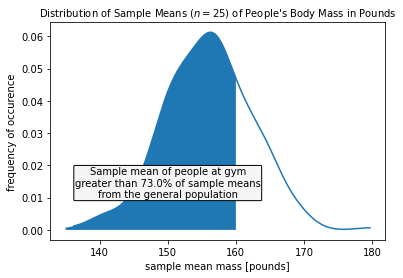

In [119]:
#plotting the distribution of sample_means
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos))
#fill the portion we are interested
shade = np.linspace(135, gym_sample_mean, 300)
plt.fill_between(shade, kde(shade))
#legend and axis labels
plt.text(x=150, y=.01, horizontalalignment='center', fontsize=10, 
         s="Sample mean of people at gym\ngreater than {0}% of sample means\nfrom the general population".format(round(prop_values_less_than_gym_mean*100, 2)), 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Body Mass in Pounds", fontsize=10)
plt.xlabel("sample mean mass [pounds]")
plt.ylabel("frequency of occurence");

### Critical Z-Scores


Next, let's calculate the exact z-score values that bound 95% of the data. We know that the tails on each end should be 2.5% or 0.025 of the the total area under the curve of the sampling distribution.

Below, we use a z-score of 1.96 to calculate a tail of 0.025.

In [120]:
tail = 1 - stats.norm.cdf(1.96)

[Back to top](#Index:) 
<a id='q6'></a>

### Question 6:

*5 points*
    
    
The exact bounds for the area in which 95% of sample means lie from the population mean can be calculated via 
    $$\text{lower_bound}  = \text{mean_of_sample} - \text{z-score}*\text{SE}  ,$$ and 
    $$\text{upper_bound}  = \text{mean_of_sample} + \text{z-score}*\text{SE}  .$$
    
    
Given the formulas above, calculate the lower and upper bounds. Assign the results to `lower_bound` and `upper_bound` respectively.

In [121]:
### GRADED
### YOUR SOLUTION HERE
lower_bound= None
upper_bound = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Confidence Interval for Gym Members' Body Mass 

If we sampled everyone who frequented the gym, we know there'd likely be a new population of values of people's body mass, but we don't know where it would be. There's a 95% chance we'd see the `gym_sample_mean` in this new distribution of body masses for people that frequent the gym.


We can calculate where we'd expect 95% of the values to lie in this new distribution. 95% of new sample means of people from the gym would fall within 1.96 standard errors from the expected population mean.


For our case, we can express a generic formula for a 95% confidence interval for the expected population body mass of gym-goers as:

$$[160−1.96*\text{SE}, 160+1.96∗\text{SE}]$$


[Back to top](#Index:) 
<a id='q7'></a>

### Question 7:

*5 points*
    
Given the definition of confidence interval above, calculate the lower and upper bounds for our 95% confidence interval. Assign your results to `lower_interval` and `upper_interval`, respectively. 

In [ ]:
### GRADED
### YOUR SOLUTION HERE
lower_interval= None
upper_interval = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


We conclude this section of the assignment by visualizing the 95% confidence interval.

In [ ]:
#plot of the distribution
sns.distplot(sample_means, hist=False)
#tile
plt.title("Distribution of Sample Means ($n=25$) of People's Body Mass in Pounds", fontsize=10)
#plotting the mean line and the lower and upper bounds
plt.axvline(x=gym_sample_mean, linestyle='--', linewidth=2.5, label="sample mean gym ppl (point estimate)", c='orange')
plt.axvline(x=lower_interval, linestyle='--', linewidth=2.5, label="lower bound 95% CI ", c='g')
plt.axvline(x=upper_interval, linestyle='--', linewidth=2.5, label="upper bound 95% CI", c='purple')
#axis labels and legend
plt.xlabel("sample mean mass [pounds]")
plt.ylabel("frequency of occurence")
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");

## Part 2: A/B testing

### Loading the dataset

For this part of the assignment, we will be using an extension of the [Web Analytics data set](http://scholarworks.montana.edu/xmlui/handle/1/3507) provided by the University of Montana. This data set has been analyzed for research papers and educational purposes in A/B testing. 

The data set has 3 columns of interest -- the date, A/B, representing two versions of a company's website (`A`, the original version, and `B`, the new version), and the number of users who subscribed to the site each day. Each day, 50% of site visitors were directed to version `A` of the website at random, and 50% were directed to version `B`.

Let's import the necessary libraries and load this data set using the pandas `pd.read_csv()` function. Finally, we will explore the dataset using `df.head()`.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import the data set
analytics = pd.read_csv('./data/google_analytics.csv')

# Examine the first few rows
analytics.head()

You'll notice that there are two empty, unnamed columns in the data set. Let's go ahead and drop them, as we won't be needing them for our analysis. Afterward, we re-examine the first few rows of the data set to ensure the columns were properly dropped.

In [ ]:
# Drop 2 empty columns
analytics.drop(['Unnamed: 3', 'Unnamed: 4'], axis = 'columns', inplace = True)

analytics.head()


#### Identifying a Research Question
Hypothesis testing begins with identifying a research question of interest. Data scientists draw inspiration for these questions from a wide variety of sources such as the needs of a population of interest (i.e., _Will the closing of a factory impact asthma rates in Queens?_ ), the needs of a business (i.e., _Will this new website design impact traffic and subscription rates?_ ), and many others. Research questions are often simply inspired by curiosity and data that happens to be available (as evidenced by the wide variety of data sets and analyses available on [Kaggle](http://kaggle.com)).

A research question should be a clear, concise representation of your topic that ultimately informs the structure of your hypothesis. There are 3 main types of research questions:
- **Causal question:** a research question investigating the nature of a _causal_ relationship between two or more variables. For example, a researcher can ask _Does the new test design impact student performance in Engineering 101?_
- **Descriptive question:** a research question investigating descriptive information about a phenomenon, i.e., _How well do students perform in Engineering 101?_
- **Comparative questions:** a research question investigating trends, group differences, or variability in two or more variables, or in one variable between two groups, i.e., _Do sophomores tend to have higher grades in Engineering 101 than freshmen?_ , or _Is there a relationship between student age and performance in Engineering 101?_

These 3 types of research questions offer a framework for structuring the majority of inquiries you will make as a data scientist.

[Back to top](#Index:) 
<a id='q8'></a>

### Question 8:

*5 points*


Let's identify our research question based on the `analytics` data set. We know that we have two groups - `A` and `B` - that represent the number of clicks for users who were randomly directed to the old and new versions of the website. We're interested in whether version `A` or `B` of the website leads to a greater number of daily subscriptions.

Which of the following research question(s) is the most appropriate for our inquiry? 
- a) How many people subscribed to the website each day?
- b) Does the new version of the website impact the daily subscription rate?
- c) What is the correlation between subscription rates for version `A` and version `B` of the website?

Assign the character(s) corresponding to the correct answer to `ans1` below.

In [ ]:
### GRADED

### YOUR SOLUTION HERE
ans1 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


####  Stating a Hypothesis
With a clear and actionable research question, ( _Does the new version of the website impact the daily subscription rate?_ ) you can move on to the next step of stating your hypothesis. 

A **hypothesis** is a clear and *testable* prediction that serves as a starting point for an investigation and analysis. Your research question serves as the basis for the predictions stated in your hypothesis. Hypotheses are stated in two formats -- the **null hypothesis** and **alternative hypothesis**.

The null hypothesis is a formal statement predicting the lack of change, difference, or other statistical relationship that you're interested in. It's stated using the symbolic notation, $H_0$. Here's an example:

$H_0$: There is no significant relationship between age and income.

The alternative hypothesis states the specific outcome that you are interested in. It uses the notation, $H_1$, and where relevant, includes the specific _direction_ of the relationship. Here's another example:

$H_1$: Income significantly increases with age.

The more _specific_ and _testable_ your null and alternative hypotheses, the more clearly you can identify the appropriate statistical test(s) for analyzing your data.

---

What do you _hypothesize_ will be the impact of the new version of the website on daily subscriptions?

We likely expect our new website design, `B`, to lead to an increase in subscriptions. Thus, we have a specific direction of interest for our alternative hypothesis.

[Back to top](#Index:) 
<a id='q9'></a>

### Question 9:

*5 points*

Which of the following null and alternative hypotheses are the best set of predictions for our research questions?

- a) $H_0$: There is no significant difference in daily subscriptions between version `A` and `B` of the website.
- b) $H_0$: There is no significant relationship between daily subscriptions for version `A` and `B` of the website.
- c) $H_1$: There is a significant difference in daily subscriptions between version `A` and `B` of the website.
- d) $H_1$: Version `B` of the website has significantly more daily subscriptions than version `A`.

Assign the letter(s) corresponding to your answer as a `list` in `ans2` below.

In [ ]:
### GRADED

### YOUR SOLUTION HERE
ans2 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Choose the Appropriate Statistical Test

The most commonly used statistical test in A/B testing is the **t-test**. A t-test is a type of _inferential statistics_ that uses statistics from a two groups in a sample to _infer_ whether or not a difference between those groups exists in the broader population.

A t-test is an example of a _parametric_ statistical test. Parametric statistical tests assume that the sample and its population follow a normal distribution. While this is often the case, a t-test may not be appropriate for every distribution. In many cases, you may want to use more than one statistical test to validate your results. You can consider including a _non-parametric test_ , which do not require that your data is normally distributed. An appropriate non-parametric test for comparing the means of two groups is the Wilcoxon signed-rank test.

For this analysis, we will start by using a t-test, which is available in Python as part of the `scipy.stats` library. Let's import the necessary function, `ttest_ind`, to be used later on.

In [ ]:
# Import library
from scipy.stats import ttest_ind

#### Determining the Necessary Sample Size

In previous weeks, we covered a formula for determining the minimum sample size necessary for a statistical test. Testing for a minimum necessary sample size is a key step in hypothesis testing to ensure that the results of your statistical tests are accurate. This is often referred to as a _power analysis_ -- which is an analysis of whether or not you have a  sample size necessary to ensure sufficient statistical power. 

In this case study, we have our data set already loaded. When conducting an A/B test in a real-world setting such as a business, you will often need to conduct an _a priori power analysis_ to determine how many data points are necessary to detect a real, statistically significant effect in your sample. We can do this using the `statsmodels` library in Python.

Let's import the `TTestIndPower` class, which is used to calculate the necessary sample size given your desired threshold for three parameters -- the _alpha level_ , the _statistical power_ , and the desired _effect size_ for the t-test.
- _Alpha level:_ an upper threshold that you set in all parametric statistical tests to evaluate the _p-value_ generated by the majority of statistical tests. A common threshold for alpha is **.05**, which indicates we will only accept our results as _statistically significant_ if the resulting p-value is below .05 (indicating a 5% likelihood of your statistical relationship being present by random chance).
- _Statistical power:_ the probability that you will detect a true difference in your population. This is commonly set to 0.8.
- _Effect size:_ the magnitude of a result present in the population. The most common effect size measure used for a t-test is _Cohen's d._ We'll set the value to 0.50, commonly used to represent a _medium_ effect size. You can read more about effect sizes [here](http://staff.bath.ac.uk/pssiw/stats2/page2/page14/page14.html).


[Back to top](#Index:) 
<a id='q10'></a>

### Question 10:

*10 points*

Use the function`TTestIndPower` to calculate the t-test power. Assign this result to the variable `ttest_pwr`.

Next, use the `solve_power()` function on `ttest_pwr` to calculate the necessary sample size.

**NOTE:**  `solve_power()` is part of the module  and takes 5 arguments -- the effect size, power, number of observations (leave this as None if you are looking to predict the necessary sample size), the ratio of data points between groups, and the alpha.

Set:

- effect = 0.50
- power = 0.80
- nobs1 =  None
- ratio=1.0
- alpha = 0.05

Assign the result to `ans10`.

In [ ]:
from statsmodels.stats.power import TTestIndPower
### GRADED

### YOUR SOLUTION HERE
ttest_pwr = None
ans10 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Conducting the Statistical Test
Our `analytics` data set has enough data points to conduct a statistical test with 80% power, an alpha of .05, and a medium effect size. 

The t-test is a formula that compares the two groups' means and standard deviations to determine if the difference between the two groups is large enough that it likely doesn't occur by chance. Below is an example of two overlapping distributions:

![ttest](./images/ttest.png)


The two groups being compared in a t-test need to meet one key assumption, _normality_ , before running our test. We can test this using the `skew` function in `scipy.stats`. A higher skew (positive or negative), indicates that your distribution is skewed.

[Back to top](#Index:) 
<a id='q11'></a>

### Question 11:

*10 points*
    
Use the `scipy` function `skewtest` to compute the skewness of the data in the `A` and `B` columns. Assign the results to `ans11_a` and `ans12_b`, respectively.

In [ ]:
from scipy.stats import skewtest
### GRADED

### YOUR SOLUTION HERE
ans11_a = None
ans11_b = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


We can see that the skew is fairly close to 0, with a p-value close to 1. Thus, we will conclude that the data is approximately normally distributed. We can proceed with our t-test.

In [ ]:
# Conduct t-test
t_stat, p_val = ttest_ind(analytics['A'], analytics['B'], equal_var=False)
print('T-statistic:',t_stat)
print('P-value:',p_val)

#### Interpreting the Statistical Tests
Let's interpret the two values we just generated.

##### t-statistic
The t-statistic is a coefficient indicating the magnitude of the difference between the two distributions of groups A and B. A larger value (positive or negative) indicates a larger difference between the two groups. Using the alpha level and degrees of freedom (sample size - 1) your t-statistic serves as a threshold value to determine whether or not your results meet the criteria for statistical significance. You can access a t-table for comprehensive comparisons [here](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf). 

Based on an alpha level of .05 (column 7 in the t-table), and degrees of freedom of 84 (we'll use 80 in the table), we can say our t-statistic of -2.6 is greater than the threshold of +/- 1.990.

##### p-value
The majority of statistical tests allow you to calculate a _p-value_ or _significance value_. A p-value is the probability that, if you were to survey the entire population, your sample mean differences would be the same or greater than what you found. We set an alpha level of .05, indicating that we need our p-value to be below this threshold for statistical significance.

Based on our p-value of .01, we can conclude that there is a _statistically significant difference between version A an B of the website_. In other words, _visitors who saw version B of the website were significantly more likely to subscribe than those who saw version A._



### 5. Drawing Conclusions

[Back to top](#Index:) 
<a id='q12'></a>

### Question 12:

*5 points*

We now know that the difference between version A and B of the website is statistically significant. Our next step is to return to the null and alternative hypothesis and decide on the following:

- a. Do we accept the alternative hypothesis, and reject the null hypothesis?
- b.  Do we lack statistical evidence, failing to reject the null hypothesis?

Assign the character corresponding to your answer to `ans12`.

In [ ]:
from scipy.stats import skewtest
### GRADED

### YOUR SOLUTION HERE
ans12 = None

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Thus, we can conclude that the new version of the website, version B, leads to higher subscription rates!